## Final Project

See Readme.md for description

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy
import numpy as np


In [2]:
# import M>8 eq data, downloaded from USGS website

M8_df = pd.read_csv('../data/eqs/query.csv')

M8_df['time'] =  pd.to_datetime(M8_df['time'])

M8_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2013-05-24 05:44:48.980,54.892,153.221,598.1,8.3,mww,385.0,10.0,NaN,1.02,...,2018-09-28T15:50:34.357Z,Sea of Okhotsk,earthquake,NaN,4.1,NaN,NaN,reviewed,us,us
1,2013-02-06 01:12:25.830,-10.799,165.114,24.0,8.0,mww,460.0,20.9,NaN,1.29,...,2018-10-17T20:37:49.468Z,"76km W of Lata, Solomon Islands",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
2,2012-04-11 10:43:10.850,0.802,92.463,25.1,8.2,mwc,341.0,14.9,NaN,0.90,...,2017-11-14T14:43:51.550Z,off the west coast of northern Sumatra,earthquake,NaN,7.3,NaN,NaN,reviewed,us,us
3,2012-04-11 08:38:36.720,2.327,93.063,20.0,8.6,mw,499.0,16.6,NaN,1.33,...,2018-10-17T20:36:26.118Z,off the west coast of northern Sumatra,earthquake,NaN,NaN,NaN,NaN,reviewed,us,official
4,2011-03-11 05:46:24.120,38.297,142.373,29.0,9.1,mww,541.0,9.5,NaN,1.16,...,2018-10-17T20:34:32.261Z,"near the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,official


In [3]:
#load glacial eq data, downloaded from Harvard CMT

GL_df = pd.read_csv('../data/eqs/CMT_glacialEQ.csv')
GL_df.head()

,lat,lon,amplitude_1014kgm,year,month,day,hour,minute,second,lat2,lon2,Msurf,Region Number,ID
0,68.63,-32.94,1.97,1993,1,24,10,21,4,68.50,-33.50,5.1,1,E199301241021
1,65.23,-40.87,0.63,1993,7,26,12,26,40,65.75,-41.25,4.9,3,E199307261226
2,68.58,-32.90,0.75,1993,8,5,2,0,40,68.75,-32.75,4.9,1,E199308050200
3,68.66,-33.12,0.60,1993,8,24,2,56,0,67.00,-35.00,4.8,1,E199308240256
4,66.38,-37.72,0.35,1993,10,19,21,10,0,66.50,-37.50,4.8,2,E199310192110


In [4]:
#reformat time column for glacial eq to be like this : e.g., '2013-05-24T05:44:48.980Z'

datetime_temp = []

for i in range(len(GL_df)):
    year = str(GL_df['year'][i])
    month = str(GL_df['month'][i]).zfill(2)
    day = str(GL_df['day'][i]).zfill(2)
    hour = str(GL_df['hour'][i]).zfill(2)
    minute = str(GL_df['minute'][i]).zfill(2)
    second = str(GL_df['second'][i]).zfill(2)
    us = str('.' + '000')
    datetime_temp.append(str(year) + '-' + str(month)  + '-' + str(day) + 'T'\
                     + str(hour) + ':' + str(minute) + ':' +str(second) + us +'Z')

In [5]:
GL_df['datetime'] = datetime_temp
GL_df['datetime'] = pd.to_datetime(GL_df['datetime'])
GL_df.head()

,lat,lon,amplitude_1014kgm,year,month,day,hour,minute,second,lat2,lon2,Msurf,Region Number,ID,datetime
0,68.63,-32.94,1.97,1993,1,24,10,21,4,68.50,-33.50,5.1,1,E199301241021,1993-01-24 10:21:04
1,65.23,-40.87,0.63,1993,7,26,12,26,40,65.75,-41.25,4.9,3,E199307261226,1993-07-26 12:26:40
2,68.58,-32.90,0.75,1993,8,5,2,0,40,68.75,-32.75,4.9,1,E199308050200,1993-08-05 02:00:40
3,68.66,-33.12,0.60,1993,8,24,2,56,0,67.00,-35.00,4.8,1,E199308240256,1993-08-24 02:56:00
4,66.38,-37.72,0.35,1993,10,19,21,10,0,66.50,-37.50,4.8,2,E199310192110,1993-10-19 21:10:00


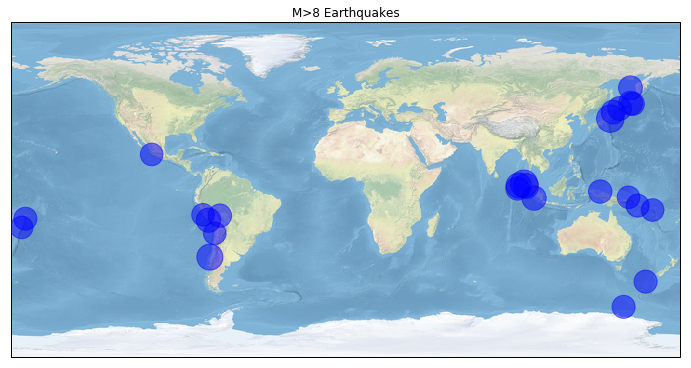

In [6]:
#plot global M>8 earthquakes


fig, ax = plt.subplots(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(M8_df['longitude'], M8_df['latitude'], M8_df['mag'] ** 3, 
           c='blue', alpha=0.5, zorder=10)

ax.set_title('M>8 Earthquakes');

Text(0.5,1,'Mag 8 EQs')

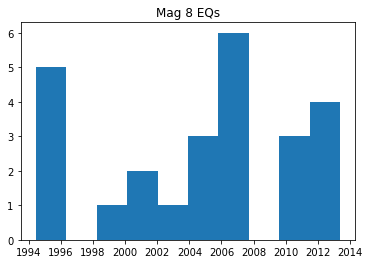

In [7]:
plt.hist(M8_df.time)
plt.title('Mag 8 EQs')

In [8]:
central_lon

NameError: name 'central_lon' is not defined

In [ ]:
#plot glacial earthquakes
fig, ax = plt.subplots(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()


extent = [-88.33, 0, 58.91, 81.51]

central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
central_lat, central_lon


plt.scatter(GL_df['lon'], GL_df['lat'], GL_df['Msurf'] ** 2.5, 
           c='green', alpha=0.5, zorder=10)

ax.set_extent(extent)
ax.set_title('Glacial Earthquakes');

In [ ]:
plt.hist(GL_df.datetime)
plt.title('Glacial EQs')

### I would like to use this spatial data, but I can't get it to work! I need help with this... it doesn't look like what we were working with in class

In [13]:
# load balance velocity data
import xarray as xr

filenc = '../data/balancevelo/RDGBV4_Greenland_1993_2013_01_balance_velocity_9ka.nc'
filexml = '../data/balancevelo/RDGBV4_Greenland_1993_2013_01_balance_velocity_9ka.nc.xml'

In [14]:
filenc = '../data/balancevelo/RDGBV4_Greenland_1993_2013_01_balance_velocity_9ka.nc'
filenc


'../data/balancevelo/RDGBV4_Greenland_1993_2013_01_balance_velocity_9ka.nc'

In [15]:
dsnc = xr.open_dataset(filenc)
dsnc.attrs

# 5 km grid on EPSG:3413
# Projection and Grid Description
# Table 2. EPSG:3413 NSIDC Sea Ice Polar Stereographic North Projection: 	Polar Stereographic
# Latitude of the origin 	90°
# Longitude of the origin (central meridian) 	-45°
# Standard parallel 	70°
# Scaling factor 	1
# False eastings 	0
# False northings 	0
# Ellipsoid 	WGS84
# Datum 	WGS84
# Units 	meters



OrderedDict([('title', '9-ka balance velocity of the Greenland Ice Sheet'),
             ('original file name',
              'RDGBV4_Greenland_1993_2013_01_balance_velocity_9ka.nc'),
             ('version', '1'),
             ('citation',
              'MacGregor, J.A., W.T. Colgan, M.A. Fahnestock, M. Morlighem, G.A. Catania, J.D. Paden and S.P. Gogineni (in press), Holocene deceleration of the Greenland Ice Sheet, Science, 351(6273), 590-593, doi:10.1002/science.aab1702'),
             ('date generated', '30-Sep-2016 10:16:05'),
             ('point of contact',
              'Joseph MacGregor, joseph.a.macgregor@nasa.gov'),
             ('grid projection',
              'EPSG:3413 NSIDC Sea Ice Polar Stereographic North')])

In [16]:
dsnc.data_vars

Data variables:
    accumulation_rate                        (number of distinct fields: 3, number of grid points in x-direction, number of grid points in y-direction) float64 ...
    accumulation_rate_difference             (number of distinct fields: 2, number of grid points in x-direction, number of grid points in y-direction) float64 ...
    depth_isochrone                          (number of distinct fields: 2, number of grid points in x-direction, number of grid points in y-direction) float64 ...
    shape_factor                             (number of distinct fields: 3, number of grid points in x-direction, number of grid points in y-direction) float64 ...
    speed_balance                            (number of distinct fields: 3, number of grid points in x-direction, number of grid points in y-direction) float64 ...
    speed_difference                         (number of distinct fields: 4, number of grid points in x-direction, number of grid points in y-direction) float64 ...


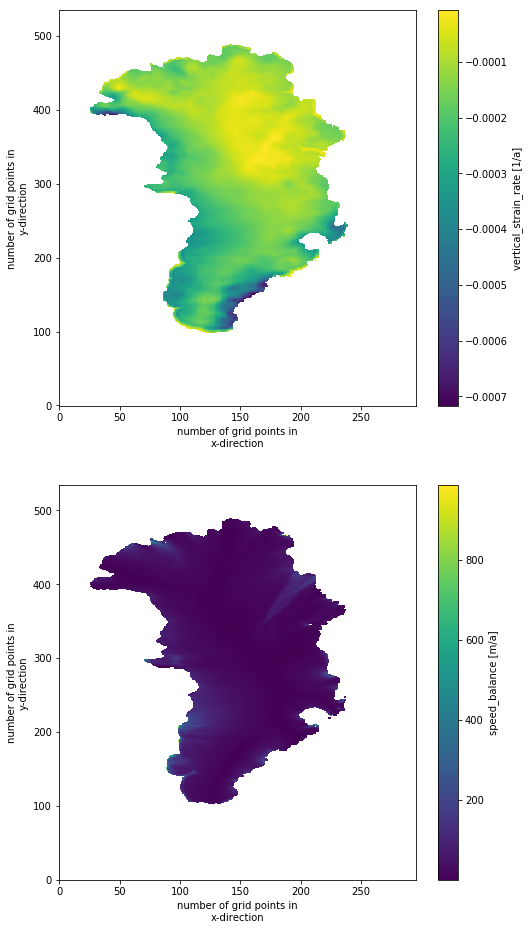

In [28]:
fig, axes = plt.subplots(nrows=2,figsize=(8,16))
ax0,ax1 = axes

dsnc.vertical_strain_rate[0,:,:].T.plot(ax=ax0)
dsnc.speed_balance[0,:,:].T.plot(ax=ax1)

# dsnc.speed_balance.mean(dim='number of distinct fields: 3').T.plot()



In [18]:
dsnc.attrs
# Sea Ice Polar Stereographic North
#  Holocene deceleration of the Greenland Ice Sheet, Science


fig, ax = plt.subplots(nrows=3, figsize=(10,18))
ax0,ax1,ax2 = ax

dsnc.shear_layer_thickness[0,:,:].T.plot()
plt.scatter(GL_df['lon'], GL_df['lat'], GL_df['Msurf'] ** 2.5, 
           c='green', alpha=0.5, zorder=10, transform = ccrs.PlateCarree())



# dsnc.vertical_strain_rate[0,:,:].T.plot(ax=ax1)
# dsnc.speed_balance[0,:,:].T.plot(ax=ax2)



ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x106ba2730> (for post_execute):


ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

<Figure size 720x1296 with 4 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.gridlines()
ax.coastlines()

proj = ccrs.NorthPolarStereo(central_longitude=-45)


dsnc.shear_layer_thickness[0,:,:].T.plot(ax=ax)#, transform=proj)






In [19]:

fig = plt.figure(figsize=(9,6))

attrs = si_ds.projection.attrs
prof = ccrs.SouthPolarStereo()


ax = plt.axes(projection=ccrs.SouthPolarStereo())

ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

NameError: name 'si_ds' is not defined

<Figure size 648x432 with 0 Axes>

In [20]:
# load basal thermal state

thermnc = '../data/basalThermalState/RDBTS4_Greenland_1993_2013_01_basal_thermal_state.nc'
thermxml = '../data/basalThermalState/RDBTS4_Greenland_1993_2013_01_basal_thermal_state.nc.xml'

In [21]:
dstherm = xr.open_dataset(thermnc)
dstherm

<xarray.Dataset>
Dimensions:                          (number of contour points - conservative: 8506, number of contour points - standard: 8139, number of distinct fields: 2: 2, number of distinct fields: 3: 3, number of grid points in x-direction: 296, number of grid points in y-direction: 535, x-y: 2)
Dimensions without coordinates: number of contour points - conservative, number of contour points - standard, number of distinct fields: 2, number of distinct fields: 3, number of grid points in x-direction, number of grid points in y-direction, x-y
Data variables:
    x                                (number of grid points in x-direction, number of grid points in y-direction) float64 ...
    y                                (number of grid points in x-direction, number of grid points in y-direction) float64 ...
    agreement_searise                (number of distinct fields: 3, number of grid points in x-direction, number of grid points in y-direction) float64 ...
    basal_melt_rate  

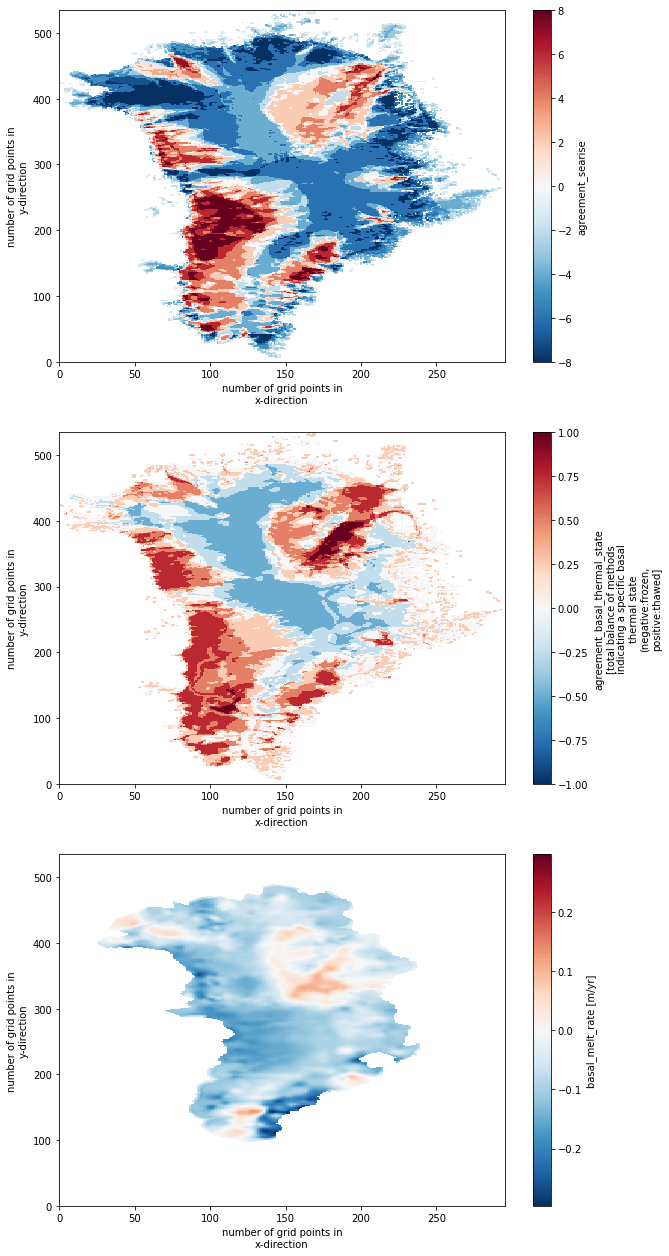

In [24]:
fig, ax = plt.subplots(nrows=3, figsize=(10,22))
ax0,ax1,ax2 = ax

dstherm.agreement_searise[0,:,:].T.plot(ax=ax0)
dstherm.agreement_basal_thermal_state[0,:,:].T.plot(ax=ax1)
dstherm.basal_melt_rate[0,:,:].T.plot(ax=ax2)



# Projection: 	Polar Stereographic
# Latitude of the origin 	90°
# Longitude of the origin (central meridian) 	-45°
# Standard parallel 	70°
# Scaling factor 	1
# False eastings 	0
# False northings 	0
# Ellipsoid 	WGS84
# Datum 	WGS84
# Units 	meters